Name: Junwei Yin GitHub: JunweiYin2394 SID:8746721183

part(b)

In [1]:
import pandas as pd
data = pd.read_csv("column_2C.dat", sep=" ", header=None)
data.columns = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis", "class_label"]
data["class_label"] = data["class_label"].map({"NO": 0, "AB": 1})
print(data.head())
print(data["class_label"].value_counts())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic_radius  degree_spondylolisthesis  class_label  
0          98.67                     -0.25            1  
1         114.41                      4.56            1  
2         105.99                     -3.53            1  
3         101.87                     11.21            1  
4         108.17                      7.92            1  
class_label
1    210
0    100
Name: count, dtype: int64


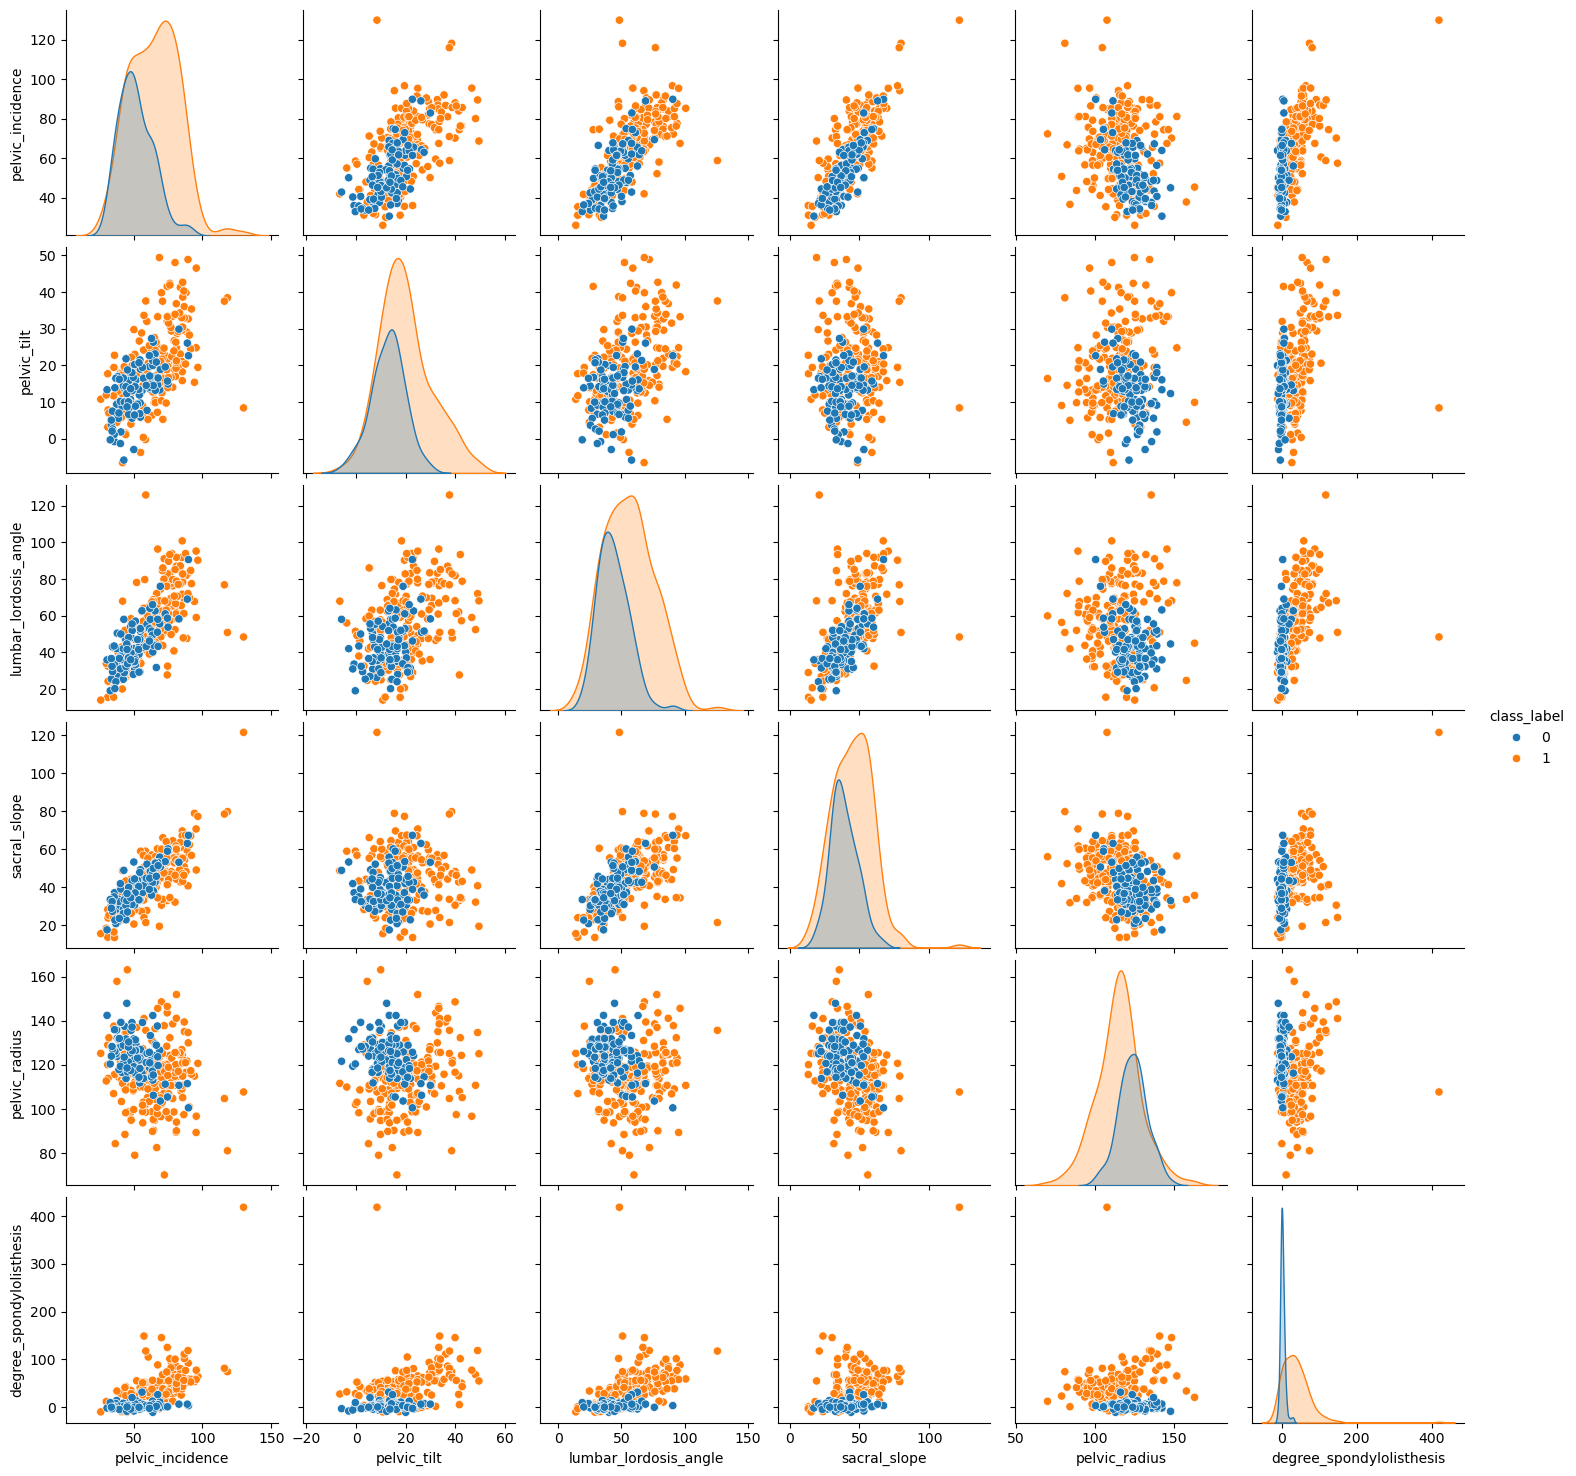

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=data, vars=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"], hue="class_label")
plt.show()

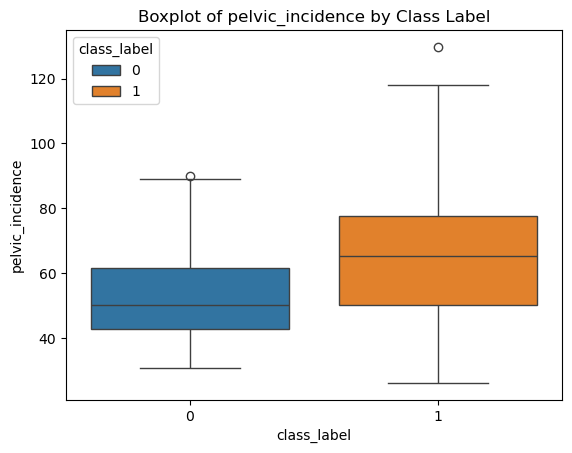

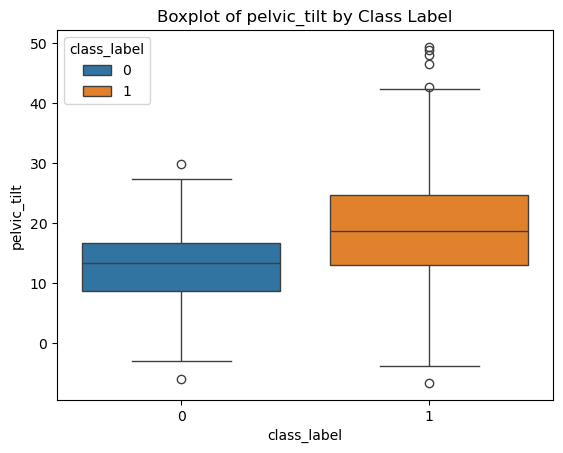

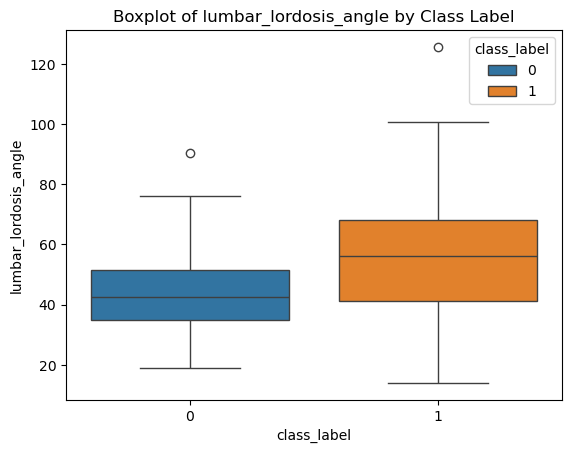

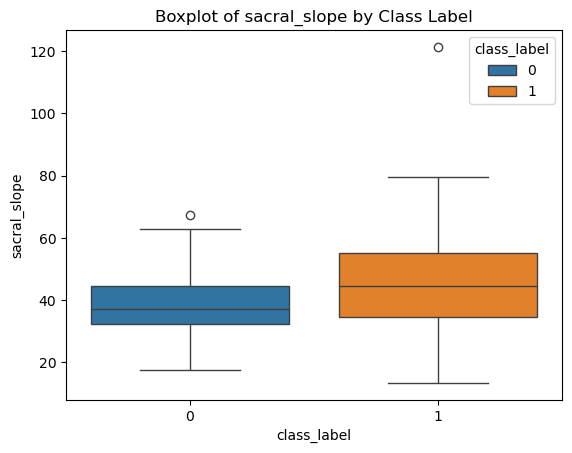

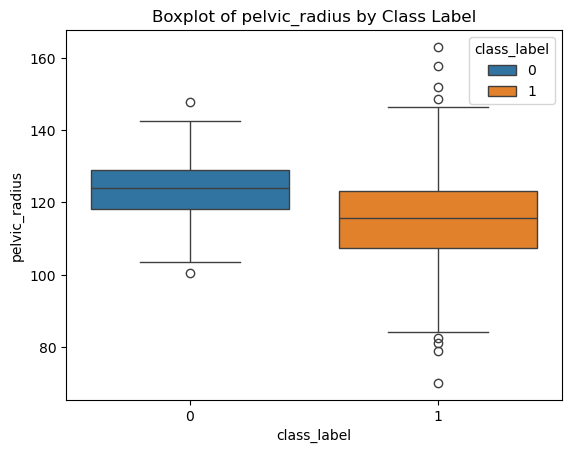

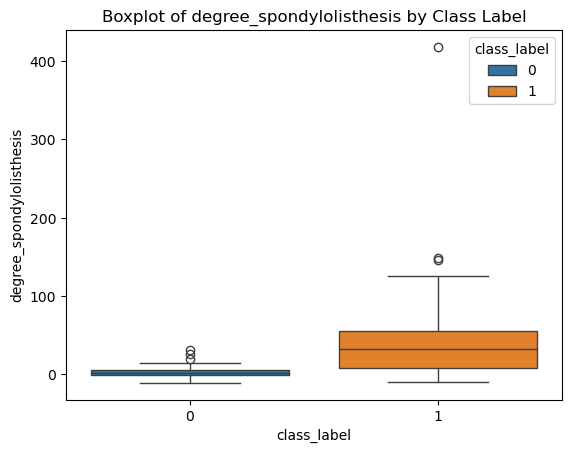

In [3]:
features = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]

for feature in features:
    sns.boxplot(data=data, x="class_label", y=feature, hue="class_label")
    plt.title(f"Boxplot of {feature} by Class Label")
    plt.show()

In [4]:
class0 = data[data["class_label"] == 0]
class1 = data[data["class_label"] == 1]

train0 = class0.iloc[:70]
train1 = class1.iloc[:140]
train = pd.concat([train0, train1])

test0 = class0.iloc[70:]
test1 = class1.iloc[140:]
test = pd.concat([test0, test1])

x_train = train.drop(columns="class_label")
y_train = train["class_label"]

x_test = test.drop(columns="class_label")
y_test = test["class_label"]


part(c)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

def knn_run(x_train, y_train, x_test, k):
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(x_train, y_train)
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)
    return y_predict_test, y_predict_train


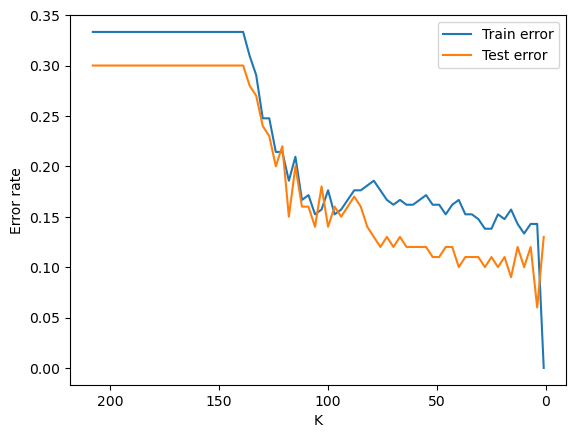

The most suitable K: 4
Confusion Matrix:
[[25  5]
 [ 1 69]]
TPR (Recall): 0.9857142857142858
TNR (Specificity): 0.8333333333333334
Precision: 0.9324324324324325
F1-score: 0.9583333333333333


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

k_range = range(208, 0, -3)
train_errors = []
test_errors = []

for k in k_range:
    y_predict_test, y_predict_train = knn_run(x_train, y_train, x_test, k)
    train_error = 1 - accuracy_score(y_train, y_predict_train)
    test_error = 1 - accuracy_score(y_test, y_predict_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(k_range, train_errors, label="Train error")
plt.plot(k_range, test_errors, label="Test error")
plt.gca().invert_xaxis()
plt.xlabel("K")
plt.ylabel("Error rate")
plt.legend()
plt.show()

min_index = np.argmin(test_errors)
suitable_k = list(k_range)[min_index]
print(f"The most suitable K: {suitable_k}")

y_predict_test_best, y_predict_train_best = knn_run(x_train, y_train, x_test, suitable_k)
cm = confusion_matrix(y_test, y_predict_test_best)
TPR = cm[1][1] / (cm[1][1] + cm[1][0])
TNR = cm[0][0] / (cm[0][0] + cm[0][1])
precision = cm[1][1] / (cm[0][1] + cm[1][1])
F1_score = 2 * precision * TPR / (precision + TPR)
print(f"Confusion Matrix:\n{cm}")
print(f"TPR (Recall): {TPR}")
print(f"TNR (Specificity): {TNR}")
print(f"Precision: {precision}")
print(f"F1-score: {F1_score}")

In [ ]:
N_range = range(10, 211, 10)
test_errors_at_best_k = []
for N in N_range:
    x_train_N = x_train.iloc[:N/3]
    y_train_N = y_train.iloc[:N/3]
    
    k_range = range(N, 0, -3)
    test_errors = []

    for k in k_range:
        y_predict_test, y_predict_train = knn_run(x_train, y_train, x_test, k)
        test_error = 1 - accuracy_score(y_test, y_predict_test)
        test_errors.append(test_error)

    best_test_error = min(test_errors)
    test_errors_at_best_k.append(best_test_error)

plt.plot(N_range, test_errors_at_best_k, marker="o")
plt.xlabel("Training set size N")
plt.ylabel("Test error at best k")
plt.title("Learning curve")
plt.show()

part(d)

In [ ]:
results = []
#A
def knn_run_metric(x_train, y_train, x_test, k, metric, p=None, metric_params=None):
    if p != None:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p)
    elif metric_params != None:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, metric_params=metric_params)
    else:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(x_train, y_train)
    y_predict_test = knn.predict(x_test)
    return y_predict_test

k_range = range(1, 197, 5)
test_errors = []

for k in k_range:
    y_predict_test = knn_run_metric(x_train, y_train, x_test, k, metric="minkowski", p=1)
    test_error = 1 - accuracy_score(y_test, y_predict_test)
    test_errors.append(test_error)

min_index = np.argmin(test_errors)
suitable_k_manhattan = list(k_range)[min_index]
suitable_error_manhattan = test_errors[min_index]
results.append(["Manhattan (p=1)", suitable_k_manhattan, suitable_error_manhattan])


#B
p_range = np.arange(0.1, 1.1, 0.1)
test_errors = []
for exp in p_range:
    p_val = 10 ** exp
    y_predict_test = knn_run_metric(x_train, y_train, x_test, suitable_k_manhattan, metric="minkowski", p=p_val)
    test_error = 1 - accuracy_score(y_test, y_predict_test)
    test_errors.append(test_error)

min_index = np.argmin(test_errors)
suitable_exp = p_range[min_index]
suitable_error_minkowski = test_errors[min_index]
results.append([f"Minkowski log10(p)={suitable_exp}", suitable_exp, suitable_error_minkowski])


#C
k_range = range(1, 197, 5)
test_errors = []

for k in k_range:
    y_predict_test = knn_run_metric(x_train, y_train, x_test, k, metric="chebyshev")
    test_error = 1 - accuracy_score(y_test, y_predict_test)
    test_errors.append(test_error)

min_index = np.argmin(test_errors)
suitable_k_Chebyshev = list(k_range)[min_index]
suitable_error_Chebyshev = test_errors[min_index]
results.append(["Chebyshev", suitable_k_Chebyshev, suitable_error_Chebyshev])


#D
from numpy.linalg import inv

V = np.cov(x_train, rowvar=False)
VI = inv(V)
k_range = range(1, 197, 5)
test_errors = []

for k in k_range:
    y_predict_test = knn_run_metric(x_train, y_train, x_test, k, metric="mahalanobis", metric_params={"VI": VI})
    test_error = 1 - accuracy_score(y_test, y_predict_test)
    test_errors.append(test_error)

min_index = np.argmin(test_errors)
suitable_k_mahalanobis = list(k_range)[min_index]
suitable_error_mahalanobis = test_errors[min_index]
results.append(["Mahalanobis", suitable_k_mahalanobis, suitable_error_mahalanobis])


results_df = pd.DataFrame(results, columns=["Metric", "Best k", "Test Error"])
print(results_df)

In [ ]:
results = []

k_range = range(1, 197, 5)
test_errors = []

def knn_run_weight(x_train, y_train, x_test, k, metric, weights):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weights)
    knn.fit(x_train, y_train)
    y_predict_test = knn.predict(x_test)
    return y_predict_test

#Euclidean
test_errors = []
for k in k_range:
    y_predict_test = knn_run_weight(x_train, y_train, x_test, k, metric="euclidean", weights="distance")
    test_error = 1 - accuracy_score(y_test, y_predict_test)
    test_errors.append(test_error)

min_index = np.argmin(test_errors)
suitable_k_euclidean = list(k_range)[min_index]
suitable_error_euclidean = test_errors[min_index]
results.append(["Euclidean(weighted)", suitable_k_euclidean, suitable_error_euclidean])


#Manhattan
test_errors = []
for k in k_range:
    y_predict_test = knn_run_weight(x_train, y_train, x_test, k, metric="manhattan", weights="distance")
    test_error = 1 - accuracy_score(y_test, y_predict_test)
    test_errors.append(test_error)

min_index = np.argmin(test_errors)
suitable_k_manhattan = list(k_range)[min_index]
suitable_error_manhattan = test_errors[min_index]
results.append(["Manhattan(weighted)", suitable_k_manhattan, suitable_error_manhattan])


#Chebyshev
test_errors = []
for k in k_range:
    y_predict_test = knn_run_weight(x_train, y_train, x_test, k, metric="chebyshev", weights="distance")
    test_error = 1 - accuracy_score(y_test, y_predict_test)
    test_errors.append(test_error)

min_index = np.argmin(test_errors)
suitable_k_chebyshev = list(k_range)[min_index]
suitable_error_chebyshev = test_errors[min_index]
results.append(["Chebyshev(weighted)", suitable_k_chebyshev, suitable_error_chebyshev])


results_df = pd.DataFrame(results, columns=["Metric", "Best k", "Test Error"])
print(results_df)